In [1]:
#make two datasets with linear and one with log and then run gradient boosted regression and forest and plot their predictions along with MSE.

import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.tree import export_graphviz
from subprocess import check_call
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

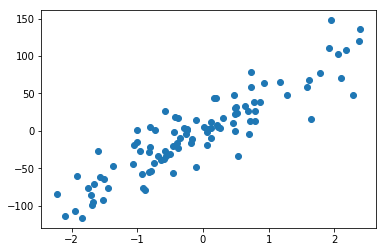

In [100]:
# Also try bayesian regression
X, y = make_regression(n_samples=100, n_features=1, noise=25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1111)
plt.scatter(X,y)

R_2: 0.4434


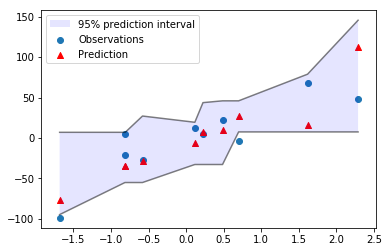

In [101]:
params1 = {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 9,
          'learning_rate': 0.01, 'loss': 'quantile', 'alpha': 0.5}
params2 = {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 9,
          'learning_rate': 0.01, 'loss': 'quantile', 'alpha': 0.05}
params3 = {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 9,
          'learning_rate': 0.01, 'loss': 'quantile', 'alpha': 0.95}
mid_model = ensemble.GradientBoostingRegressor(**params1)
lower_model = ensemble.GradientBoostingRegressor(**params2)
upper_model = ensemble.GradientBoostingRegressor(**params3)

mid_model.fit(X_train, y_train)
prd_mid = mid_model.predict(X_test)

lower_model.fit(X_train, y_train)
prd_lower = lower_model.predict(X_test)

upper_model.fit(X_train, y_train)
prd_upper = upper_model.predict(X_test)

r_2 = r2_score(y_test, prd_mid)
print("R_2: %.4f" % r_2)
plt.scatter(X_test, y_test, label=u'Observations')
plt.scatter(X_test, prd_mid, c="r", marker='^', label=u'Prediction')

a = np.array(X_test)
b = np.stack(a, axis=1)
p = b.argsort()
y1 = prd_lower[p]
plt.plot(np.sort(b[0]), y1[0], 'k', alpha = 0.5)
y2 = prd_upper[p]
plt.plot(np.sort(b[0]), y2[0], 'k', alpha = 0.5)

a = np.sort(b[0])
y_upper = y2[0]
y_lower = y1[0]
plt.fill(np.concatenate([a, a[::-1]]),
         np.concatenate([y_upper, y_lower[::-1]]),
         alpha=.1, fc='b', ec='None', label='95% prediction interval')
plt.legend(loc='upper left')

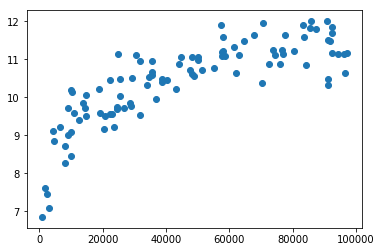

In [102]:
import numpy as np 
import random

X = np.arange(1,100000,1)
X = X.reshape(-1, 1)
y = np.log(X)
noise = np.random.normal(0, 0.5, y.shape)
y = y + noise
y = y.reshape(-1, 1)

idx = random.sample(range(0, 99999), 100)

X = X[idx]
y = y[idx]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1111)

plt.scatter(X,y)

C:\Users\RACH0_000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RACH0_000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RACH0_000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R_2: 0.5951


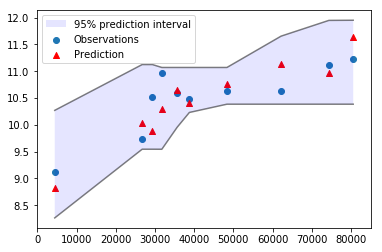

In [103]:
params1 = {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 9,
          'learning_rate': 0.01, 'loss': 'quantile', 'alpha': 0.5}
params2 = {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 9,
          'learning_rate': 0.01, 'loss': 'quantile', 'alpha': 0.05}
params3 = {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 9,
          'learning_rate': 0.01, 'loss': 'quantile', 'alpha': 0.95}
mid_model = ensemble.GradientBoostingRegressor(**params1)
lower_model = ensemble.GradientBoostingRegressor(**params2)
upper_model = ensemble.GradientBoostingRegressor(**params3)

mid_model.fit(X_train, y_train)
prd_mid = mid_model.predict(X_test)

lower_model.fit(X_train, y_train)
prd_lower = lower_model.predict(X_test)

upper_model.fit(X_train, y_train)
prd_upper = upper_model.predict(X_test)

r_2 = r2_score(y_test, prd_mid)
print("R_2: %.4f" % r_2)
plt.scatter(X_test, y_test, label=u'Observations')
plt.scatter(X_test, prd_mid, c="r", marker='^', label=u'Prediction')

a = np.array(X_test)
b = np.stack(a, axis=1)
p = b.argsort()
y1 = prd_lower[p]
plt.plot(np.sort(b[0]), y1[0], 'k', alpha = 0.5)
y2 = prd_upper[p]
plt.plot(np.sort(b[0]), y2[0], 'k', alpha = 0.5)

a = np.sort(b[0])
y_upper = y2[0]
y_lower = y1[0]
plt.fill(np.concatenate([a, a[::-1]]),
         np.concatenate([y_upper, y_lower[::-1]]),
         alpha=.1, fc='b', ec='None', label='95% prediction interval')
plt.legend(loc='upper left')

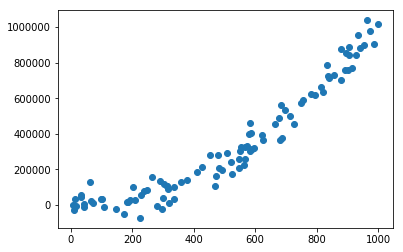

In [107]:
import numpy as np 
import random

X = np.arange(1,1000,1)
X = X.reshape(-1, 1)
y = np.power(X,2)
noise = np.random.normal(0, 50000, y.shape)
y = y + noise

y = y.reshape(-1, 1)

idx = random.sample(range(0, 999), 100)
X = X[idx]
y = y[idx]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1111)

plt.scatter(X,y)

C:\Users\RACH0_000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RACH0_000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RACH0_000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R_2: 0.9170


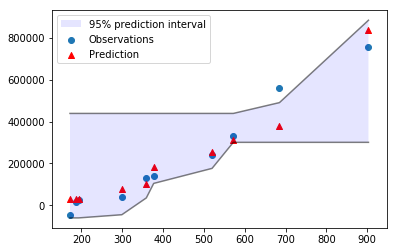

In [108]:
params1 = {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 9,
          'learning_rate': 0.01, 'loss': 'quantile', 'alpha': 0.5}
params2 = {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 9,
          'learning_rate': 0.01, 'loss': 'quantile', 'alpha': 0.05}
params3 = {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 9,
          'learning_rate': 0.01, 'loss': 'quantile', 'alpha': 0.95}
mid_model = ensemble.GradientBoostingRegressor(**params1)
lower_model = ensemble.GradientBoostingRegressor(**params2)
upper_model = ensemble.GradientBoostingRegressor(**params3)

mid_model.fit(X_train, y_train)
prd_mid = mid_model.predict(X_test)

lower_model.fit(X_train, y_train)
prd_lower = lower_model.predict(X_test)

upper_model.fit(X_train, y_train)
prd_upper = upper_model.predict(X_test)

r_2 = r2_score(y_test, prd_mid)
print("R_2: %.4f" % r_2)
plt.scatter(X_test, y_test, label=u'Observations')
plt.scatter(X_test, prd_mid, c="r", marker='^', label=u'Prediction')

a = np.array(X_test)
b = np.stack(a, axis=1)
p = b.argsort()
y1 = prd_lower[p]
plt.plot(np.sort(b[0]), y1[0], 'k', alpha = 0.5)
y2 = prd_upper[p]
plt.plot(np.sort(b[0]), y2[0], 'k', alpha = 0.5)

a = np.sort(b[0])
y_upper = y2[0]
y_lower = y1[0]
plt.fill(np.concatenate([a, a[::-1]]),
         np.concatenate([y_upper, y_lower[::-1]]),
         alpha=.1, fc='b', ec='None', label='95% prediction interval')
plt.legend(loc='upper left')